In [4]:
import numpy as np
import pandas as pd
import spacy
nlp = spacy.load("fr_core_news_lg")
from sklearn.decomposition import PCA

from sentence_transformers import SentenceTransformer
st = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens")
from utils import read_text_file, cosine_distance, get_pairwise_metric_matrix

In [8]:
macron_speech = read_text_file("discours/discours.txt")

In [9]:
macron_speech

"Bonjour, Je voulais m'adresser aujourd'hui à toutes et tous pour un message d'engagement et d'action à l'occasion de la Journée internationale des droits des femmes, et alors qu'est lancée partout dans le monde aujourd'hui même, la mobilisation générale pour le forum Génération égalité de Paris, le 7 juillet prochain. En effet, il y a 25 ans, à Pékin, la première grande conférence sur les droits des femmes avait lieu. 1995 : il avait fallu attendre si tard, si longtemps et l'engagement de toute une génération pour que le combat pour le droit des femmes soit enfin reconnu comme partie intégrante du combat pour les droits de l'homme. 25 ans après, nous sommes là. Des progrès ont été accomplis mais ils sont largement insuffisants, et parfois aujourd'hui, y compris en Europe, y compris dans les démocraties les plus avancées, largement remis en cause. Alors face à cela, une génération, la nôtre, se lève. Parce qu'il n'est pas question de reculer, parce que nous n'avons plus le temps d'atte

In [10]:
doc = nlp(macron_speech)

In [11]:
sentences = [s.text for s in doc.sents]
sentences

["Bonjour, Je voulais m'adresser aujourd'hui à toutes et tous pour un message d'engagement et d'action à l'occasion de la Journée internationale des droits des femmes, et alors qu'est lancée partout dans le monde aujourd'hui même, la mobilisation générale pour le forum Génération égalité de Paris, le 7 juillet prochain.",
 'En effet, il y a 25 ans, à Pékin, la première grande conférence sur les droits des femmes avait lieu.',
 "1995 : il avait fallu attendre si tard, si longtemps et l'engagement de toute une génération pour que le combat pour le droit des femmes soit enfin reconnu comme partie intégrante du combat pour les droits de l'homme.",
 '25 ans après, nous sommes là.',
 "Des progrès ont été accomplis mais ils sont largement insuffisants, et parfois aujourd'hui, y compris en Europe, y compris dans les démocraties les plus avancées, largement remis en cause.",
 'Alors face à cela, une génération, la nôtre, se lève.',
 "Parce qu'il n'est pas question de reculer, parce que nous n'a

In [12]:
total_emb = st.encode(macron_speech)

In [13]:
sentence_embs = st.encode(sentences)

In [15]:
distances = [cosine_distance(x, total_emb) for x in sentence_embs]
dist = pd.DataFrame({"sentence": sentences, "dist": distances}).sort_values("dist")
dist

,sentence,dist
0,"Bonjour, Je voulais m'adresser aujourd'hui à t...",0.108061
1,"En effet, il y a 25 ans, à Pékin, la première ...",0.145050
2,"1995 : il avait fallu attendre si tard, si lon...",0.192662
23,Alors je vous donne rendez-vous le 7 juillet p...,0.220380
20,L'égalité entre les femmes et les hommes est l...,0.292021
15,"Ce combat, je le mène ici en France contre la ...",0.298506
7,Alors je ne vous ferai pas de long discours su...,0.300479
22,"Nous l'avons démontré lors du G7 de Biarritz, ...",0.305495
16,Et je veux ici saluer la mobilisation de toute...,0.317890
21,"Cela vaut pour la France, comme pour notre act...",0.348003


In [16]:
print("\n".join(dist.iloc[:5].sort_index().sentence))

Bonjour, Je voulais m'adresser aujourd'hui à toutes et tous pour un message d'engagement et d'action à l'occasion de la Journée internationale des droits des femmes, et alors qu'est lancée partout dans le monde aujourd'hui même, la mobilisation générale pour le forum Génération égalité de Paris, le 7 juillet prochain.
En effet, il y a 25 ans, à Pékin, la première grande conférence sur les droits des femmes avait lieu.
1995 : il avait fallu attendre si tard, si longtemps et l'engagement de toute une génération pour que le combat pour le droit des femmes soit enfin reconnu comme partie intégrante du combat pour les droits de l'homme.
L'égalité entre les femmes et les hommes est la grande cause de mon quinquennat.
Alors je vous donne rendez-vous le 7 juillet prochain à Paris pour démontrer tous ensemble, par les actes, que nous sommes là, que nous ne reculerons pas, que nous obtiendrons des résultats tous ensemble.


In [18]:
print("\n".join(dist.iloc[-5:].sort_index().sentence))


Des progrès ont été accomplis mais ils sont largement insuffisants, et parfois aujourd'hui, y compris en Europe, y compris dans les démocraties les plus avancées, largement remis en cause.
Nous connaissons les ennemis.
Alors décidons-le.
Ce n'est pas un combat de femmes pour les femmes.
Nous n'y sommes pas encore mais nous avançons.


In [22]:
# Méthode d'Antoine : Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(5).fit(sentence_embs)
center_indices = [
    int(np.argmin([cosine_distance(x, centroid) for x in sentence_embs]))
    for centroid in kmeans.cluster_centers_
]
center_sentences = np.array(sentences)[sorted(center_indices)]

In [23]:
kmeans.labels_

array([1, 3, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 3, 0, 0, 4, 1,
       0, 1, 4])

In [43]:
print("\n".join(center_sentences))

En effet , il y a 25 ans , à Pékin , la première grande conférence sur les droits des femmes avait lieu .
Parce qu' il n' est pas question de reculer , parce que nous n' avons plus le temps d' attendre .
Nous avons les moyens d' agir , d' unir nos forces , celles des Etats , des entreprises , de la société civile , des femmes et des hommes qui ont décidé de s' engager et d' agir .
Alors je vous donne rendez-vous le 7 juillet prochain à Paris pour démontrer tous ensemble , par les actes , que nous sommes là , que nous ne reculerons pas , que nous obtiendrons des résultats tous ensemble .
Parce que nous sommes la génération de l' égalité .   


In [62]:
cluster_indices = [np.where(kmeans.labels_ == i)[0] for i in range(5)]
center_indices = [cluster_indices[i][np.argmin([cosine_distance(total_emb, sentence_embs[k]) 
                                                for k in cluster_indices[i]])]
    for i in range(5)]
global_sentences = np.array(sentences)[sorted(center_indices)]
print("\n".join(global_sentences))

Bonjour, Je voulais m'adresser aujourd'hui à toutes et tous pour un message d'engagement et d'action à l'occasion de la Journée internationale des droits des femmes, et alors qu'est lancée partout dans le monde aujourd'hui même, la mobilisation générale pour le forum Génération égalité de Paris, le 7 juillet prochain.
En effet, il y a 25 ans, à Pékin, la première grande conférence sur les droits des femmes avait lieu.
1995 : il avait fallu attendre si tard, si longtemps et l'engagement de toute une génération pour que le combat pour le droit des femmes soit enfin reconnu comme partie intégrante du combat pour les droits de l'homme.
L'égalité entre les femmes et les hommes est la grande cause de mon quinquennat.
Nous l'avons démontré lors du G7 de Biarritz, nous allons agir avec encore plus de force.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

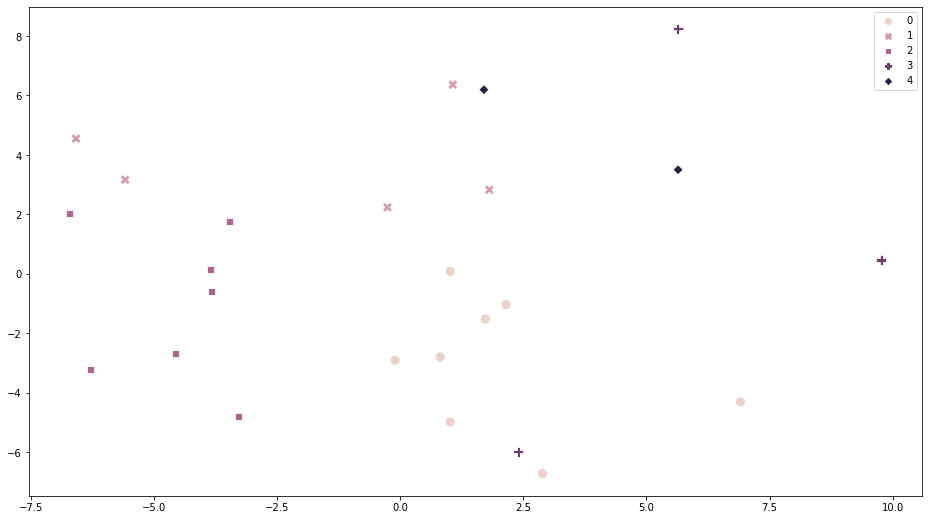

In [65]:
plt.subplots(figsize=(16, 9))
pca = PCA(2).fit_transform(sentence_embs)
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=kmeans.labels_, style=kmeans.labels_, s=100)

In [45]:
%matplotlib inline

In [48]:
sent = "  Bonjour , Je voulais m' adresser aujourd'hui à toutes et tous pour un message d' engagement et d' action à l' occasion de la Journée internationale des droits des femmes , et alors qu' est lancée partout dans le monde aujourd'hui même , la mobilisation générale pour le forum Génération égalité de Paris , le 7 juillet prochain ."
words = [x.text for x in nlp(sent)]

In [49]:
word_embs = st.encode(words)
sent_emb = st.encode(sent)

In [59]:
dist = pd.DataFrame({"word": words, "dist": [cosine_distance(x, sent_emb) for x in word_embs]}).sort_values("dist")
dist

,word,dist
56,égalité,0.363080
58,Paris,0.379534
22,action,0.383341
34,femmes,0.385007
61,7,0.385286
...,...,...
14,un,0.495071
31,des,0.497072
33,des,0.497072
38,qu,0.497092


In [53]:
pca = PCA().fit(word_embs)

In [54]:
pca.components_[:10]

array([[ 0.00587761, -0.06054205, -0.08186413, ..., -0.07214222,
        -0.03522156, -0.0370748 ],
       [ 0.01946543, -0.00062541, -0.04021171, ..., -0.00420557,
         0.02483406,  0.00452526],
       [-0.01705118, -0.02363103, -0.03332508, ...,  0.02354748,
         0.00074671, -0.03179921],
       ...,
       [ 0.01605634,  0.03655903, -0.02642335, ...,  0.05275609,
         0.00161429,  0.05044263],
       [ 0.0148987 ,  0.03154301, -0.04542315, ..., -0.00737406,
        -0.0311786 ,  0.00029867],
       [ 0.02481516, -0.03155157, -0.01831825, ...,  0.04637079,
        -0.082578  ,  0.0188059 ]], dtype=float32)

In [55]:
dist = pd.DataFrame({
    "word": words,
    **{
        f"dist_{i:0>2}": [cosine_distance(x, pca.components_[i]) for x in word_embs]
        for i in range(10)
    }
}).set_index("word")

In [56]:
dist.idxmin()

dist_00      Paris
dist_01      Paris
dist_02      forum
dist_03    égalité
dist_04      monde
dist_05     action
dist_06     action
dist_07          7
dist_08     femmes
dist_09    message
dtype: object

In [57]:
get_pairwise_metric_matrix(pca.components_[:10], metric="cosine_dist", labels=[str(x) for x in range(10)])

,0,1,2,3,4,5,6,7,8,9
0,-2.384186e-07,5.000000e-01,4.999999e-01,5.000000e-01,5.000000e-01,5.000000e-01,0.5,5.000000e-01,5.000000e-01,5.000000e-01
1,5.000000e-01,5.960464e-08,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,0.5,5.000000e-01,5.000000e-01,5.000000e-01
2,4.999999e-01,5.000000e-01,-3.576279e-07,5.000001e-01,5.000000e-01,4.999999e-01,0.5,5.000000e-01,5.000000e-01,5.000000e-01
3,5.000000e-01,5.000000e-01,5.000001e-01,2.384186e-07,5.000000e-01,5.000000e-01,0.5,5.000000e-01,5.000000e-01,5.000000e-01
4,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,2.980232e-08,5.000000e-01,0.5,4.999999e-01,5.000000e-01,5.000000e-01
5,5.000000e-01,5.000000e-01,4.999999e-01,5.000000e-01,5.000000e-01,1.192093e-07,0.5,5.000000e-01,5.000000e-01,5.000001e-01
6,5.000000e-01,5.000000e-01,5.000001e-01,5.000000e-01,5.000000e-01,5.000001e-01,0.0,4.999999e-01,5.000000e-01,5.000001e-01
7,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,4.999999e-01,5.000000e-01,0.5,-1.788139e-07,5.000000e-01,5.000000e-01
8,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,0.5,5.000000e-01,-1.192093e-07,5.000002e-01
9,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000001e-01,0.5,5.000000e-01,5.000002e-01,1.192093e-07
